# 8. Data Fitting
---
**Content:**
- [Simple / Polynomial Fits](#Simple-/-Polynomial-Fits)
- [Non-Linear Fits](#Non-Linear-Fits)

## Millikan: A Direct Photoelectric Determination of Planck's $h$
---

> *In 1915, Millikan experimentally verified Einstein's all-important photoelectric equation, and made the first direct photoelectric determination of Planck's constant h. Einstein’s 1905 paper proposed the simple description of ‘light quanta,’ or photons, and showed how they explained the photoelectric effect. **By assuming that light actually consisted of discrete energy packets, Einstein proposed a linear relationship between the maximum energy of electrons ejected from a surface, and the frequency of the incident light.** The slope of the line was Planck’s constant, introduced 5 years earlier by Planck. **Millikan was convinced that the equation had to be wrong, because of the vast body of evidence that had already shown that light was a wave.** If Einstein was correct, his equation for the photoelectric effect suggested a completely different way to measure Planck's constant.* (https://einstein.manhattanrarebooks.com/pages/books/130/robert-andrews-millikan/a-direct-photoelectric-determination-of-plank-s-h)

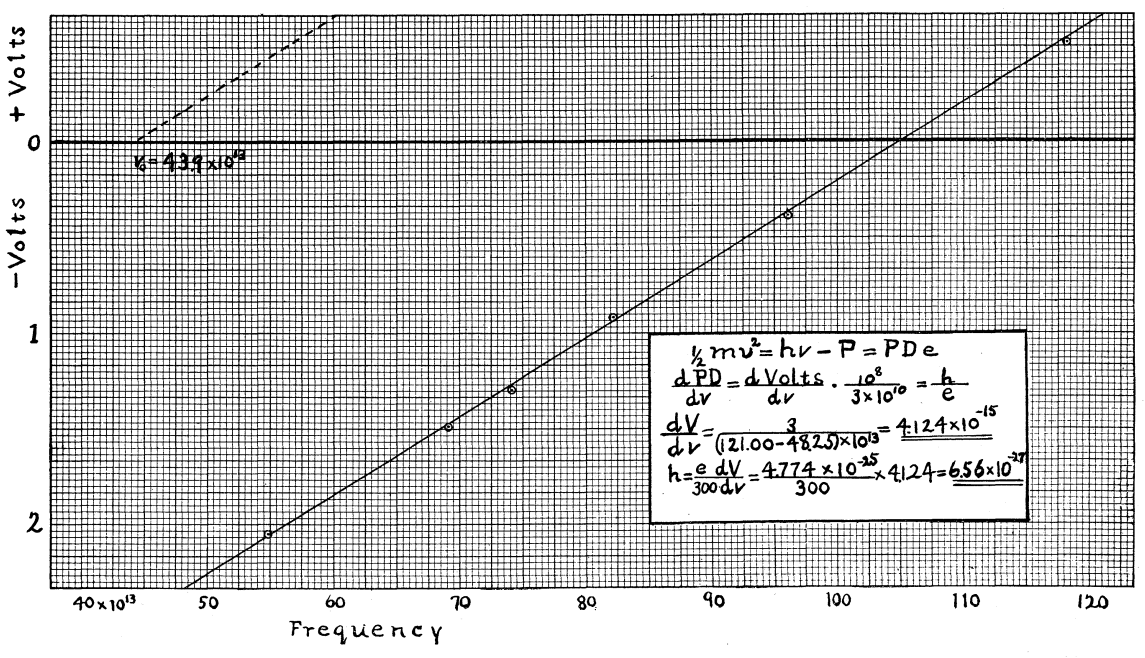

Millikan Physical Review 7 (3): 355-388 (1915)

https://journals.aps.org/pr/abstract/10.1103/PhysRev.7.355


$$\large
\frac{1}{2}mv^2 = V e = h f - p
$$

In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
# import constants from scipy
import scipy.constants as cnst

# Milikan's data in wavelength (lambda) and volts
lamb, volts = np.loadtxt('./data/05_millikan.dat', unpack=True)

# get frequency from wavelength
freq = cnst.c / ( 1e-10 * lamb )

# plot data as Milikan did
plt.figure(1)
plt.grid(True)

plt.plot(freq, volts, 'o')

plt.xlabel('frequency (Hz)')
plt.ylabel('stopping voltage (V)')

plt.show()

## Simple / Polynomial Fits
---

use Numpy's `polyfit()`:

In [ ]:
# ... degree = 1 yields: f(x) = a * x + b
# ... degree = 2 yields: f(x) = a * x^2 + b * x^1 + c * x^0
# ...

myFit = np.polyfit(freq, volts, deg=1)

print( " a =", myFit[0] )
print( " b =", myFit[1] )

In [ ]:
# plot data as Milikan did ... with the fit
plt.figure(1)
plt.grid(True)

plt.plot(freq, volts, 'o')

#plt.plot(freq, myFit[0]*freq + myFit[1]) # a * x + b

plt.plot(freq, np.polyval(myFit, freq) )

plt.xlabel('frequency (Hz)')
plt.ylabel('stopping voltage (V)')

plt.show()

In [ ]:
# compare fit to Scipy's value
h = cnst.e * myFit[0]
print('h_Millikan =', h, "Js")
print('h_Scipy    =', cnst.h, "Js")

### Polynomial Fits with Uncertain Data

In [ ]:
# data points and uncertainties
x     = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0,  5.5])
y     = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0, -1.5])
sigma = np.array([0.1, 0.1, 0.2, 0.1,  0.5,  0.3,  0.1])

# plot it
plt.figure(1)
plt.errorbar(x, y, sigma, fmt='o')
plt.show()

In [ ]:
# define weights for each data point using sigma
weights = 1.0 / sigma**2.0

# do polynomial fit using weights
myFit, V = np.polyfit(x, y, 
                      deg=1, 
                      w=weights, 
                      cov='unscaled') # get covariance matrix  

print( myFit )
print( V )

# plot it
plt.figure(1)

p = np.poly1d(myFit)
xPlot = np.linspace(0, 5.5, 100)

plt.errorbar(x, y, sigma, fmt='o')
plt.plot(xPlot, p(xPlot), '-')
plt.show()

Calculate the difference between the original data and the fitted one by evaluating the polynomial using fitting parameters `myFit` and Numpy's `polyval()` function:

In [ ]:

# estimate the quality of the fit via chi^2:
#
#          chi^2 = Sum_i [Fit(x_i) - y_i]^2 / sigma_i^2.0
#  reduced chi^2 = chi^2 / (#x - #degree)
#

diffs = np.polyval(myFit, x) - y

chi_squared = np.sum(diffs**2.0 / sigma**2.0)

red_chi_sq = chi_squared/(len(x) - 1)

print('    Chi sq =', chi_squared)
print('red Chi sq =', red_chi_sq)

# print out all fitting parameter and their "errors"

for ii in range(0, np.size(myFit)):
    
    myError = np.sqrt(V[ii,ii])
    
    print("       c_%d = %+f +/- %f"%(ii, myFit[ii], myError))

## Non-Linear Fits
---

In [ ]:
# define some test data ...
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0, 5.5])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0, -1.5])

plt.figure(1)
plt.plot(x, y, 'o')
plt.show()

Using higher order polynomials via Numpy's `polyfit()`:

In [ ]:
# fit it with an higher polynom
myFit = np.polyfit(x, y, deg=4)
print( myFit )

In [ ]:
# create a callable function from myFit (parameters)
myFitPolynom = np.poly1d( myFit )

# plot it on a self-defined grid
xPlot = np.linspace(0, 6, 100)

plt.figure(1)

# original data
plt.plot(x, y, 'o')

# fitted data
plt.plot(xPlot, myFitPolynom(xPlot), '-')

plt.show()

In [ ]:
# load data including inaccuracies from file
xdata, ydata, sigma = np.loadtxt('./data/03_xyerr.dat').transpose()

plt.figure(1)

# and plot it
plt.plot(xdata, ydata, 'o')  

# let's try to fit by hand 
# ... using a scaled and shifted exp(-x) function

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xFit = np.linspace(0, 4, 50)
yFit = func(xdata, 2.6, 1.0, 0.5)

plt.plot(xFit, yFit, 'r-')  

plt.show()

Let's use Scipy's `curve_fit()` function:

In [ ]:
from scipy.optimize import curve_fit

# define fitting function

def myFitFunc(x, a, b):
    return a * np.exp(-b * x) 

# and fit it properly using curve_fit

myFit, V = curve_fit(myFitFunc, 
                     xdata, 
                     ydata, 
                     sigma=sigma)

print( myFit )
print( V )

In [ ]:
# print out all fitting parameter and their "errors"
chars = ['a', 'b', 'c']

for ii in range(0, np.size(myFit)):
    myError = np.sqrt(V[ii,ii])
    print("         %s = %+f +/- %f"%(chars[ii], myFit[ii], myError))

In [ ]:
# evaluate fit function at original x-values
yFit = myFitFunc(xdata, *myFit)         # Note the usage of *myFit

# and get red chi^2 from this
red_chi_sq = np.sum((yFit - ydata)**2/sigma**2)/(len(xdata) - len(myFit))

print('red Chi sq =', red_chi_sq)

In [ ]:
# plot data including error bars
plt.errorbar(xdata, ydata, yerr = sigma, fmt = 'o')

# as well as the fit
plt.plot(xdata, yFit, 'r-')

plt.show()